# Exercise 9: Sound and music description

With this exercise you will learn to describe sounds with simple machine learning methods. You will learn to use the Freesound API to load pre-computed sound descriptors from Freesound and to perform sound clustering and classification with them. You will work with instrumental sounds, thus learning what audio features are useful for characterizing them.

There are four parts in this exercise: 1) Download sounds and descriptors from Freesound, 2) Select two descriptors for a good sound clustering, 3) Cluster sounds using k-means, and 4) Classify sounds using k-NN.

We provide the code for each task, thus no need to get involved in much programming. 

### Relevant Concepts

#### Freesound API
With the Freesound API you can browse, search, and retrieve information from Freesound, such as automatically extracted features from audio files. You can also perform advanced queries combining content analysis features and other metadata (tags, etc...). With the API you can do text searches similar to what you can do from the advanced searches in the website http://freesound.org/search/?q, but implementing the queries in software. If you are interested in knowing more about the Freesound API, you can see examples of using it with python in: https://github.com/MTG/freesound-python/blob/master/examples.py and you can read the API documentation, http://www.freesound.org/docs/api/

#### Sound descriptors
In this exercise, you will use sound descriptors that have been pre-computed with Essentia, https://essentia.upf.edu and are stored in the Freesound database together with the corresponding sounds. Many sound descriptors can be extracted using Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) and in Freesound, a number of them are used. In the Freesound API documentation there is specifc information of the descriptors available in Freesound, https://freesound.org/docs/api/analysis_index.html.

### Euclidian distance
The Euclidian distance is the straight-line distance between two points in an n-dimensional space, thus the distance between points $p$ and $q$ is the length of the line segment connecting them. If $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance, $d$, from $p$ to $q$, or from $q$ to $p$ is given by the Pythagorean formula:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### K-means clustering (k-means)
K-means clustering is a method of vector quantization that is popular for cluster analysis in data mining. K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The problem is computationally difficult (NP-hard), however, efficient heuristic algorithms converge quickly to a local optimum. 

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, where $μ_i$ is the mean of points in $S_i$.


### K-nearest neighbours classifier (k-NN)
K-nearest neighbours classification (k-NN) is a non-parametric method in which the input consists of the $k$ closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


## Part 1: Download sounds and descriptors from Freesound

Download a collection of instrumental sounds and their descriptors from Freesound using the Freesound API.

First get a Freesound API key from http://www.freesound.org/apiv2/apply/ and create a directory in the workspace with the name `testDownload` to store the sounds and descriptors. You also need to install the python client for the freesound API. Do this by cloning the repository https://github.com/MTG/freesound-python, into a folder and installing it following the instructions. You will have to import the freesound module in the code.

You will be calling the function `download_sounds_freesound()` whose input parameters are:
1. `queryText` (string): A single word or a string of words without spaces (use hyphens), typically the name of the instrument. e.g. (eg. "violin", "trumpet", "cello", "bassoon", etc.)
2. `tag` (string): tag to be used for filtering the searched sounds (e.g., "multisample", "single-note", "velocity", "tenuto", etc.).
3. `duration` (2 floating point numbers): min and max duration (seconds) of the sound to filter, e.g., (0.2,15).
4. `API_Key` (string): your API key.
5. `outputDir` (string): path to the directory where you want to store the sounds and their descriptors.
6. `topNResults` (integer): number of results (sounds) that you want to download.
7. `featureExt` (file extension): file extension for storing sound descriptor (.json, typically).

In the call to `download_sounds_freesound()` you will have to choose the appropriate queryText, tag, and duration, to return single notes/strokes of instrumental sounds. The first twenty results of the query should be "good". Note that the tag can be empty. Example of a query to obtain single notes of violin could be: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. This returns 20 single notes of violin sounds and the script stores them in the `testDownload` directory (the directory has to be created beforehand).

Download and store twenty sound examples of each instrument using the `download_sounds_freesound()` function given below. The examples need to be representative of the instrument and coherent, single notes (melodic instruments) or single strokes (percussion instruments), and shorter than 10 seconds. Specify a good query text, tag, and duration to query for the chosen instruments. Refine your search parameters until you get twenty adequate samples for each instrument. Select three instruments to be used out of this set: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (cymbals used in Beijing Opera). Listen to the sounds downloaded and look at the descriptor .json files.

Before using the API to download the sounds, we recommend to do the same query using the Freesound website and checking that the top 20 results are good.

In [1]:
import os, sys
import json
sys.path.append('../../freesound-python/')  # directory were you installed the freesound-python repository
import freesound as fs

descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

In [2]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key,"token")  
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.system("mkdir " + outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [3]:
# call download_sounds_freesound for 3 instruments with parameters to obtain adequate sounds
### your code here

duration_Guitar = (0.0,4.0)
duration_Clarinet = (4.0,6.0)
duration_Violin = (0.0,3.0)

API_Key_ = "7iEWYSMeiayVx62h4ULHaSoO83hx1JYD2gxedrXN"
outputDir_ = "testDownload/"
topNResults_ = 20
featureExt_ = '.json'

download_sounds_freesound(queryText = "violin", tag="single-note", duration=duration_Violin, API_Key = API_Key_, outputDir = outputDir_, topNResults = topNResults_, featureExt = featureExt_)
download_sounds_freesound(queryText = "guitar", tag="1-shot", duration=duration_Guitar, API_Key = API_Key_, outputDir = outputDir_, topNResults = topNResults_, featureExt = featureExt_)
download_sounds_freesound(queryText = "clarinet", tag="single-note", duration=duration_Clarinet, API_Key = API_Key_, outputDir = outputDir_, topNResults = topNResults_, featureExt = featureExt_)


### explain the coherence of the sound collections obtained
"""
Violin sounds;
all normal articulation (bowed) violin sounds around 3 seconds long

Clarinet sounds;
all clarinet sounds around 5 seconds long

Guitar sounds;
all guitar harmonics sounds around 4 seconds long

All sounds are single note sounds, and for each instrument the timbre is pretty similar.
I think the 3 classes of sounds are quite perceptually distinct from each other
(e.g. the guitar harmonics contain quite often only even harmonics of the vibrating string,
while the clarinet sound contains mostly odd harmonics), and
each class contains a quite homogeneous group of sounds.
"""


'\nViolin sounds;\nall normal articulation (bowed) violin sounds around 3 seconds long\n\nClarinet sounds;\nall clarinet sounds around 5 seconds long\n\nGuitar sounds;\nall guitar harmonics sounds around 4 seconds long\n\nAll sounds are single note sounds, and for each instrument the timbre is pretty similar.\nI think the 3 classes of sounds are quite perceptually distinct from each other\n(e.g. the guitar harmonics contain quite often only even harmonics of the vibrating string,\nwhile the clarinet sound contains mostly odd harmonics), and\neach class contains a quite homogeneous group of sounds.\n'

## Part 2: Select two descriptors for a good sound clustering

Select two of the sound descriptors obtained from Task 1 in order to obtain a good clustering of the sounds of three instruments in a two dimensional space. By visualizing the descriptor values of the sounds in a 2D plot you can choose the features that can help to better cluster these instruments. 

You take as inputs the downloaded sounds folder (`targetDir`) and the descriptor pair indices (`descInput`) (see mapping) to create a 2-D scatter plot of the descriptor pair. The data points, sounds, from different instruments are shown with different colors. In addition, you can also plot the Freesound ID of the sounds with the points. Only plot the sounds of the 3 instruments chosen. Make sure that in `targetDir` you only have the 3 instruments chosen.

Choose a good pair of descriptors for the sounds of the 3 instruments you downloaded in Part 1. A good pair of descriptors leads to a point distribution where all the sounds of an instrument cluster together, with a good separation from the other instrument clusters. Try out different combinations of descriptor pairs. Write a short paragraph on the descriptor pairs you tried out, justifying your choices for selecting those particular descriptors. Based on the spectral and temporal features of the instruments and sounds, give an explanation of why (or why not) a good clustering is (or is not) achieved with the chosen pairs of descriptors.

From the code given you can generate a 2-D scatter plot of all sounds for the chosen descriptor pairs. 

In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [5]:
def convFtrDict2List(ftrDict):
  """
  This function converts descriptor dictionary to an np.array. The order in the numpy array (indices) 
  are same as those mentioned in descriptorMapping dictionary.
  
  Input: 
    ftrDict (dict): dictionary containing descriptors downloaded from the freesound
  Output: 
    ftr (np.ndarray): Numpy array containing the descriptors for processing later on
  """
  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

def fetchDataDetails(inputDir, descExt = '.json'):
  """
  This function is used by other functions to obtain the information regarding the directory structure 
  and the location of descriptor files for each sound 
  """
  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        remain, rname, cname, sname = path.split('/')[:-3], path.split('/')[-3], path.split('/')[-2], path.split('/')[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}
  return dataDetails

'\nUsing these descriptors;\n\n                      0: \'lowlevel.spectral_centroid.mean\',\n                      1: \'lowlevel.dissonance.mean\'\n                      \ndoes not really yield good results.\nThe \'lowlevel.spectral_centroid.mean\' feature seems to make the points blend, to confuse between each other\n(apart from a very few violin samples).\nThe \'lowlevel.dissonance.mean\' seems to separate a little better violin and clarinet,\nbut the guitar is spread all over its axis.\n\nUsing these descriptors;\n\n                      2: \'lowlevel.hfc.mean\',\n                      4: \'sfx.inharmonicity.mean\'\n\ndoes not really yield good results either.\nThe \'lowlevel.hfc.mean\' (High Frequency Content of a spectrum - mean) could\nseparate decently guitar and clarinet, but the violin spreads over the other\n2 classes.\nAbout \'sfx.inharmonicity.mean\', all 3 instruments have quite low values so\nthis is probably not a good descriptor to use.\n\nUsing these descriptors;\n\n 

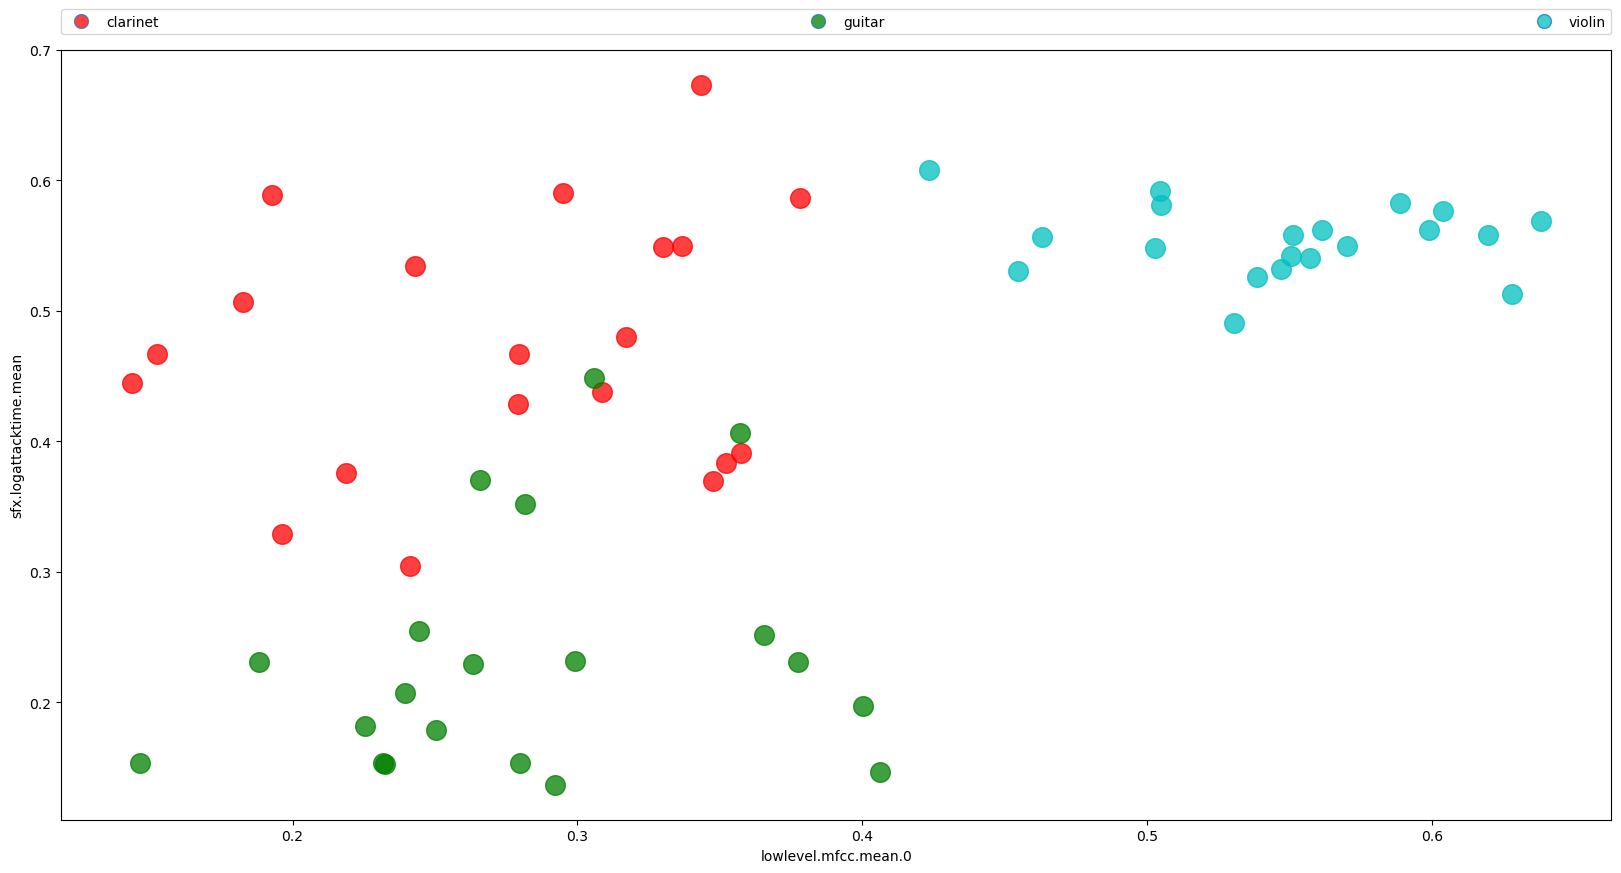

In [6]:
# code to select the descriptors to plot of the three instruments chosen
inputDir = "testDownload/"

### this is the main line to modify, select two descriptors, change the XX by a number from 0 to 16

"""
# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }
"""

# 11: 'lowlevel.mfcc.mean.0' and 3: 'sfx.logattacktime.mean'
# MFCC descriptors Essentia's docs; https://essentia.upf.edu/reference/streaming_MFCC.html
descInput = (11,3)


# no need to change the code from here
anotOn = 0
dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

plt.figure(figsize=(20, 10))

legArray = []
catArray = []
for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ)
  
plt.ylabel(descriptorMapping[descInput[1]])
plt.xlabel(descriptorMapping[descInput[0]])
plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)

#### Explain the results
"""
Using these descriptors;

                      0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean'
                      
does not really yield good results.
The 'lowlevel.spectral_centroid.mean' feature seems to make the points blend, to confuse between each other
(apart from a very few violin samples).
The 'lowlevel.dissonance.mean' seems to separate a little better violin and clarinet,
but the guitar is spread all over its axis.

Using these descriptors;

                      2: 'lowlevel.hfc.mean',
                      4: 'sfx.inharmonicity.mean'

does not really yield good results either.
The 'lowlevel.hfc.mean' (High Frequency Content of a spectrum - mean) could
separate decently guitar and clarinet, but the violin spreads over the other
2 classes.
About 'sfx.inharmonicity.mean', all 3 instruments have quite low values so
this is probably not a good descriptor to use.

Using these descriptors;

                      11: 'lowlevel.mfcc.mean.0',
                      3: 'sfx.logattacktime.mean'
                      
leads to quite good results. The violin is very well separated from the others,
while guitar and clarinet are also pretty well separately-clustered, but
some outliers (+- 3) for each class tend to overlap with the other class' space.
There is no relevant perceptual spectral shape (feature 'lowlevel.mfcc.mean.0') difference between guitar
and clarinet (these features overlap along the x axis), but there is a relevant difference between
guitar and clarinet in terms of 'sfx.logattacktime.mean' (the one of the guitar is clearly shorter than the one
of the clarinet). So we can say that these 2 descriptors "compensate" each other and, together with this
data-set, provide a good compromise and well-separated classes.
It's not crystal clear, from Essentia's documentation, whether the 1st MFCC coefficient (n. 0 -> lowlevel.mfcc.mean.0')
is the actual first coefficient got from the MFCC computation (the D.C. offset component, which would
basically describe the frequency mag amplitude of each sound's spectra) or the second one (which is the output
of the DCT computation with a sinewave of period 1). In the first case, the lowlevel.mfcc.mean.0 would 
basically be the amplitude of the sound, while in the second case the lowlevel.mfcc.mean.0 would represent
the wider sine-wave like changes in the spectra shapes.
Guitar and clarinet are pretty much the same in the lowlevel.mfcc.mean.0 dimension, while the violin
stands out with higher values.

In general, I find good to plot 1 frequency (mag spectrum) based feature against 1 time based feature.
They tend to compensate each other's lack of clear distinction between classes (instruments, in this case).
"""

In [7]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[]):
  """
  This function clusters all the sounds in targetDir using kmeans clustering.
  
  Input:
    targetDir (string): Directory where sound descriptors are stored (all the sounds in this 
                        directory will be used for clustering)
    nCluster (int): Number of clusters to be used for kmeans clustering.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance 
                       computation (see descriptorMapping)
  Output:
    Prints the class of each cluster (computed by a majority vote), number of sounds in each 
    cluster and information (sound-id, sound-class and classification decision) of the sounds 
    in each cluster. Optionally, you can uncomment the return statement to return the same data.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    
    print("\n(Cluster: " + str(ii) + ") Using majority voting as a criterion this cluster belongs to " + 
          "class: " + classCluster[-1])
    print ("Number of sounds in this cluster are: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    print ("sound-id, sound-class, classification decision")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  print("Out of %d sounds, %d sounds are incorrectly classified considering that one cluster should "
        "ideally contain sounds from only a single class"%(totalSounds, nIncorrectClassified))
  print("You obtain a classification (based on obtained clusters and majority voting) accuracy "
         "of %.2f percentage"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  # return ClusterOut

In [8]:
# run the function clusterSounds 
### your code here

targetDir_ = "testDownload/"

"""
# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }
"""

descInput_ = [11,3]
cluster_sounds(targetDir_, nCluster = 3, descInput = descInput_)

descInput_ = [11,3,9]
cluster_sounds(targetDir_, nCluster = 3, descInput = descInput_)

### Explain the results
"""
K means clustering is often used in unsupervised machine learning applications, which work with
unlabelled data-sets (raw audios, in our case).

With descriptors

                     11: 'lowlevel.mfcc.mean.0' and
                     3: 'sfx.logattacktime.mean'
                     
I have 90 % accuracy, which I think is good enough.
As expected, the error is among guitar and clarinet, since there are no errors in violin clustering.
4 guitar sounds were wrongly classified as clarinet (which makes sense because from the plot above we see that there are 4 guitar outliers with a longer log attack time),
2 clarinet sounds were wrongly classified as guitar.

Thus, I should separate better the guitar from the clarinet, by adding a descriptor.
By adding one of these decriptors;

                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      
the results are increasingly worse (I get an accuracy below 90 %, down to 65 %).
Only by adding
        
                      9: 'lowlevel.spectral_contrast.mean.4',
        
I get 85 % accuracy (still, anyway, worse than with 2 descriptors only).


It can be seen that not always having more descriptors yields better accuracy.
"""


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: guitar
Number of sounds in this cluster are: 18
sound-id, sound-class, classification decision
[['248479' 'clarinet' '0']
 ['248718' 'clarinet' '0']
 ['183741' 'guitar' '1']
 ['183745' 'guitar' '1']
 ['183753' 'guitar' '1']
 ['183754' 'guitar' '1']
 ['183759' 'guitar' '1']
 ['183760' 'guitar' '1']
 ['183761' 'guitar' '1']
 ['183762' 'guitar' '1']
 ['183764' 'guitar' '1']
 ['183766' 'guitar' '1']
 ['183769' 'guitar' '1']
 ['183770' 'guitar' '1']
 ['183771' 'guitar' '1']
 ['183772' 'guitar' '1']
 ['183805' 'guitar' '1']
 ['183809' 'guitar' '1']]

(Cluster: 1) Using majority voting as a criterion this cluster belongs to class: clarinet
Number of sounds in this cluster are: 22
sound-id, sound-class, classification decision
[['248381' 'clarinet' '1']
 ['248390' 'clarinet' '1']
 ['248425' 'clarinet' '1']
 ['248455' 'clarinet' '1']
 ['248476' 'clarinet' '1']
 ['248478' 'clarinet' '1']
 ['248700' 'clarinet' '1']


"\nK means clustering is often used in unsupervised machine learning applications, which work with\nunlabelled data-sets (raw audios, in our case).\n\nWith descriptors\n\n                     11: 'lowlevel.mfcc.mean.0' and\n                     3: 'sfx.logattacktime.mean'\n                     \nI have 90 % accuracy, which I think is good enough.\nAs expected, the error is among guitar and clarinet, since there are no errors in violin clustering.\n4 guitar sounds were wrongly classified as clarinet (which makes sense because from the plot above we see that there are 4 guitar outliers with a longer log attack time),\n2 clarinet sounds were wrongly classified as guitar.\n\nThus, I should separate better the guitar from the clarinet, by adding a descriptor.\nBy adding one of these decriptors;\n\n                      4: 'sfx.inharmonicity.mean',\n                      5: 'lowlevel.spectral_contrast.mean.0',\n                      6: 'lowlevel.spectral_contrast.mean.1',\n                  

## Part 4: Classify sounds with k-NN

Assign a sound different from the sounds of the 3 instruments chosen to one of the 3 instrumental classes you chose in Part 1, using the k-nearest neighbours classifier (k-NN). 

Given a new sound (query sound) and its descriptors, use the function `classify_sound_kNN()` for doing a k-NN classification. It uses a distance measure based on Euclidian distance which is implemented in `compute_similar_sounds()`. `classify_sound_kNN()` returns the instrument class that the query sound is classified into. 

The goal of the exercise is to experiment with the k-NN classifier and be able to understand the result by being able to explain why a particular query sound, that is not from any of the defined classes, is actually classified to one of those classes.

4.1 Get query sounds from Freesound. To get query sounds and their descriptors, you can use `download_sounds_freesound()` function using different query texts (as you did in Part 1). Get sounds that are not from the 3 instruments you chose in Part 1, or at least that is none of the sounds you used to define the classes. If you use a sound from one of the three instruments make sure that is different enough from the existing sounds in your collections.

4.2 Perform 5 classifications. You can use as many descriptors as you need (the fewer you use, the easier it will be, to explain the result). k is usually chosen to be an odd positive integer. Try out with different query sounds, different subsets of descriptors, and different values of k. Explain the reason for choosing the descriptors you used and the value of k you selected. Include cases where you think the classification is incorrect, and cases with a query sound of an instrument different from the starting classes. By trying out a sound from a different instrument, you are classifying the sound into the closest instrument class, which can tell you about similarity between instruments.

In [9]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  This function returns similar sounds for a specific queryFile. Given a queryFile this function 
  computes the distance of the query to all the sounds found in the targetDir and sorts them in 
  the increasing order of the distance. This way we can obtain similar sounds to a query sound.
  
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    descInput (list) : list of indices of the descriptors to be used for similarity/distance computation 
                       (see descriptorMapping)
  Output: 
    List containing an ordered list of similar sounds. 
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  This function performs the KNN classification of a sound. The nearest neighbors are chosen from 
  the sounds in the targetDir.
   
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    K (int) : Number of nearest neighbors to consider for KNN classification.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance computation 
                      (see descriptorMapping)
  Output:
    predClass (string): Predicted class of the query sound
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  predClass =  classes[indMax]
  print ("This sample belongs to class: " + str(predClass))
  return predClass


In [10]:
# 4.1 download one sound 
### your code here
duration_Synth = (0.0,10.0)
API_Key_ = "7iEWYSMeiayVx62h4ULHaSoO83hx1JYD2gxedrXN"
outputDir_ = "testDownload_kNN/"
topNResults_ = 1
featureExt_ = '.json'

download_sounds_freesound(queryText = "synth", tag=("FM","synth"), duration=duration_Synth, API_Key = API_Key_, outputDir = outputDir_, topNResults = topNResults_, featureExt = featureExt_)

### explain your choice
"""
I downloaded a synthetic rich sound, clearly perceptually different from the more "natural", "acoustic" previous
instrumental sounds of violin, guitar and clarinet. The sound has also an "echo-like" effect applied.

I created a new folder ("testDownload_kNN"), different from the previous folder where we performed k means clustering.
This helps keeping datasets (the old 60 sounds classified with k means and the single new synth sound) separated.
Also, the query files are not copied/scanned twice (if so, I get a warning
-"Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification."-,
and the kNN algorithm, with low values of K, 
detected the new sound as belonging to the class "synth", which shouldn't happen).
"""

'\nI downloaded a synthetic rich sound, clearly perceptually different from the more "natural", "acoustic" previous\ninstrumental sounds of violin, guitar and clarinet. The sound has also an "echo-like" effect applied.\n\nI created a new folder ("testDownload_kNN"), different from the previous folder where we performed k means clustering.\nThis helps keeping datasets (the old 60 sounds classified with k means and the single new synth sound) separated.\nAlso, the query files are not copied/scanned twice (if so, I get a warning\n-"Warning: We found an exact copy of the query file in the target directory. "\n          "Beware of duplicates while doing KNN classification."-,\nand the kNN algorithm, with low values of K, \ndetected the new sound as belonging to the class "synth", which shouldn\'t happen).\n'

In [11]:
# 4.2 classify the donwloaded sound
### your code here


classify_sound_kNN('testDownload_kNN/synth/579724/579724_11502075-lq.json', "testDownload/", 60, [11,3])

classify_sound_kNN('testDownload_kNN/synth/579724/579724_11502075-lq.json', "testDownload/", 8, [11,3])

classify_sound_kNN('testDownload_kNN/synth/579724/579724_11502075-lq.json', "testDownload/", 60, [11,3,0])

classify_sound_kNN('testDownload_kNN/synth/579724/579724_11502075-lq.json', "testDownload/", 8, [0])

classify_sound_kNN('testDownload_kNN/synth/579724/579724_11502075-lq.json', "testDownload/", 60, [11,3,0,1])

### explain the classification
"""
k Nearest Neighbors is a supervised machine learning algorithm, useful when we want to classify only 1 newly-added
data point to an already classified data-set.

I set K = 60 so that the new sound is compared against ALL previous sounds already present in the dataset.
The new sound is classified as guitar sound, so it means that the closest neighbor of the new sound
is a sound previously classified as guitar sound.
This is the kNN classification configuration which is most similar (and, hence, most pertinent and coherent with)
to the previously performed k means clustering,
since it takes into account all 60 sounds and with the same sound descriptors
k means clustering has been performed. Though, K could be much reduced in order to increase performance.

With same values, but K = 8 (+- square root of N, where N is the total number of samples),
the sound is still classified as a guitar sound.

Taking into account 60 neighbors, but with 1 extra sound descriptor (0: 'lowlevel.spectral_centroid.mean'),
the sound is classified as a clarinet sound.
This means that the 'lowlevel.spectral_centroid.mean' descriptor is not good for discerning between the 3 already
created classes of sounds (we saw this also previously when plotting the values of 2 descriptors);
the 3 classes have all similar values of spectral centroid.

Taking into account 8 neighbors, but with ONLY the extra sound descriptor (0: 'lowlevel.spectral_centroid.mean'),
the sound is classified as a clarinet sound.
Same as above, but only 'lowlevel.spectral_centroid.mean' is taken into account.

Taking into account 60 neighbors, and adding again an extra sound descriptor (1: 'lowlevel.dissonance.mean'),
the sound is classified again as a guitar sound.
'lowlevel.dissonance.mean' is better than 'lowlevel.spectral_centroid.mean' for separating these 3 classes of sounds.
In fact, all sounds have quite clearly different values of dissonance (to what extent the ratios between harmonics/overtones
ad F0 are integer) but similar values of spectral centroid.



It can clearly be seen that, depending on the descriptors used, the new sound is classified differently (correctly or wrongly).
Also, the descriptors seem to be more important than K in the classification outcome.
Of course, the lower the K, the more performative our algorithm is.
So, we can set K, usually, as square root of N, where N is the total number of samples.
In theory, the value of K should be computed using the "elbow" method.

In this case we only have 60 data points so computing high values of K does not really
decrease performance too much, but in real world scenarios, where we probably have huge data-sets,
K should be computed accordingly in order to obtain a compromise between accuracy and performance.
"""

This sample belongs to class: guitar
This sample belongs to class: guitar
This sample belongs to class: clarinet
This sample belongs to class: clarinet
This sample belongs to class: guitar


'\nk Nearest Neighbors is a supervised machine learning algorithm, useful when we want to classify only 1 newly-added\ndata point to an already classified data-set.\n\nI set K = 60 so that the new sound is compared against ALL previous sounds already present in the dataset.\nThe new sound is classified as guitar sound, so it means that the closest neighbor of the new sound\nis a sound previously classified as guitar sound.\nThis is the kNN classification configuration which is most similar (and, hence, most pertinent and coherent with)\nto the previously performed k means clustering,\nsince it takes into account all 60 sounds and with the same sound descriptors\nk means clustering has been performed. Though, K could be much reduced in order to increase performance.\n\nWith same values, but K = 8 (+- square root of N, where N is the total number of samples),\nthe sound is still classified as a guitar sound.\n\nTaking into account 60 neighbors, but with 1 extra sound descriptor (0: \'low